# Wolves Detection and Feature Engineer for Image

In [4]:
# Basic libs
import numpy as np
import pandas as pd

# Open CV
import cv2

# Visualization
from matplotlib import colors
from matplotlib import pyplot as plt

%matplotlib inline

In [16]:
def show(image):
    """show image in fixed size"""
    plt.figure(figsize=(9, 9))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(img):
    """show image in HSV color"""
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    show(hsv)

def show_rgb(img):
    """show image in RGB color"""
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    show(rgb)

def show_color_layers(img):
    """ """
    # Show Red/Green/Blue
    images = []
    for i in [0, 1, 2]:
        colour = img.copy()
        if i != 0: colour[:,:,0] = 0
        if i != 1: colour[:,:,1] = 0
        if i != 2: colour[:,:,2] = 0
        images.append(colour)

    show(np.vstack(images))
    
def show_mask(mask):
    """create a mask from the image"""
    plt.figure(figsize=(9, 9))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    """Overlay mask on top of the image"""
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)


 Shape of this image is (253, 450, 3)

 Type of this image is uint8


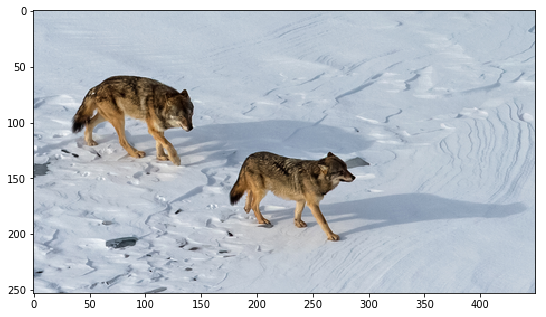

In [13]:
img = cv2.imread('../data/wolves.png')
print("\n Shape of this image is {}".format(img.shape))
print("\n Type of this image is {}".format(img.dtype))
show_rgb(img)

### We can also display the image in several different color model:
- Show Red layer
- Show Green layer
- Show Blue layer
- Show picture in gray scale
- Show picture in Hue - Saturation - Value scale

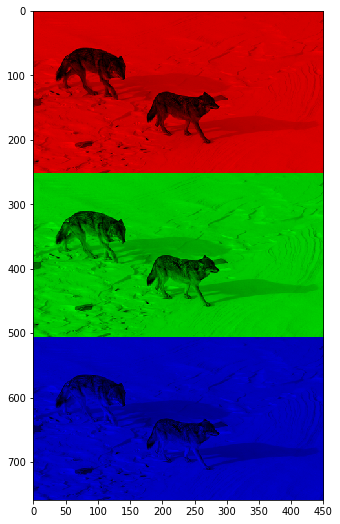

In [17]:
# Show Red/Green/Blue
show_color_layers(img)

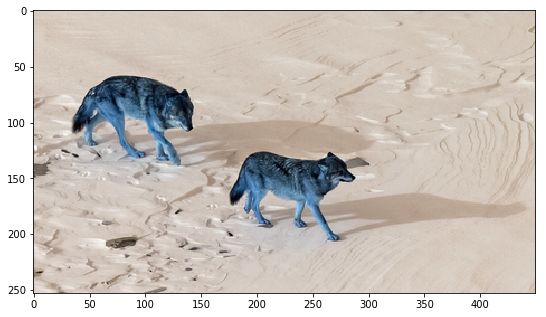

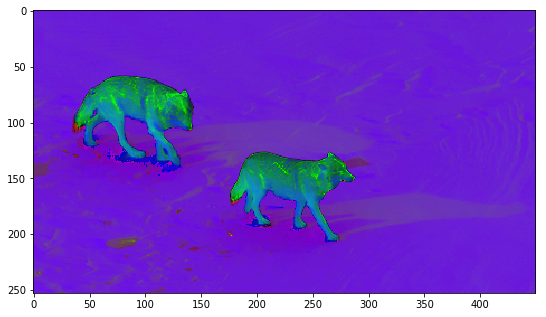

In [18]:
# Gray scale
show(img)

# HSV scale
show_hsv(img)

It can be seen that using HSV making the wolves stand out more than other color model. Let's explore a little more about HSV:
![](../assets/index.png)

Now I will plot the histogram of each element in HSV 

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

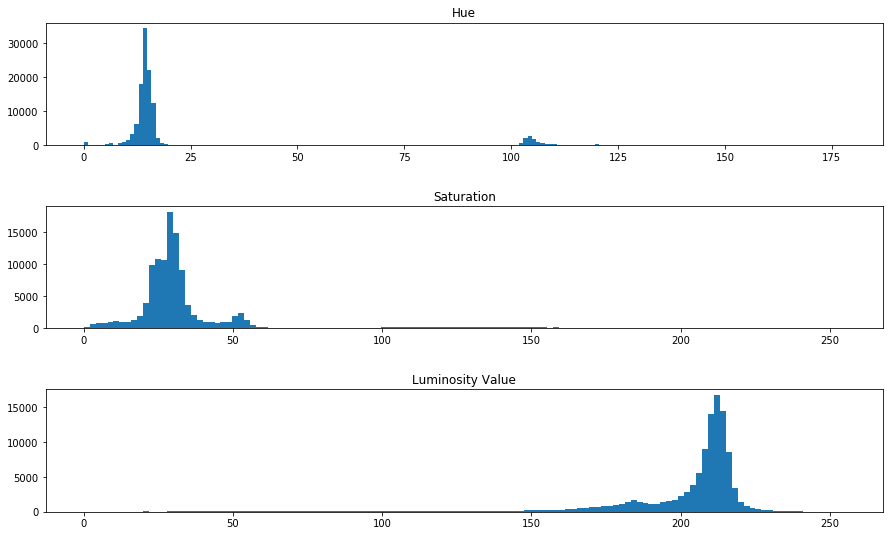

In [45]:
# convert to hsv
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# extract hue, saturation and value
hue, sat, val = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]

# plotting
plt.figure(figsize=(15,9))
# 3 rows, 1 column, plot in 1st cell of the column
plt.subplot(311)                             
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(hue), bins=180)

# 3 rows, 1 column, plot in 2nd cell of the column
plt.subplot(312)                             
plt.title("Saturation")
plt.hist(np.ndarray.flatten(sat), bins=128)

# 3 rows, 1 column, plot in 3rd cell of the column
plt.subplot(313)                            
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(val), bins=128)
plt.show()

For a closer look at color distribution in hue histogram, we can see in the plot below the dominance of color blue while yellow and red are pretty insignificant.

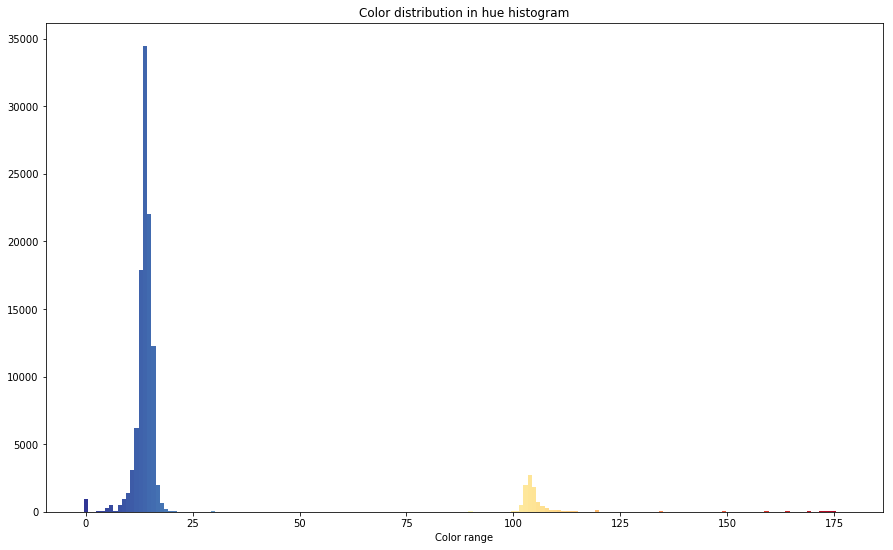

In [53]:
cm = plt.cm.get_cmap('RdYlBu_r')
plt.figure(figsize=(15,9))

# Get the histogramp
Y,X = np.histogram(np.ndarray.flatten(hue), bins=180)

# Set the color
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]

# Plot
plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.title("Color distribution in hue histogram")
plt.xlabel("Color range")
plt.show()

### Other methods:
- Crop image
- Blur image

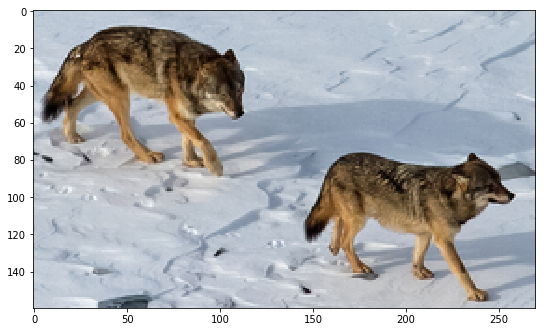

In [25]:
# Crop image to the part that has wolves
image_cropped = image[50:210, 30:300]
show_rgb(image_cropped)

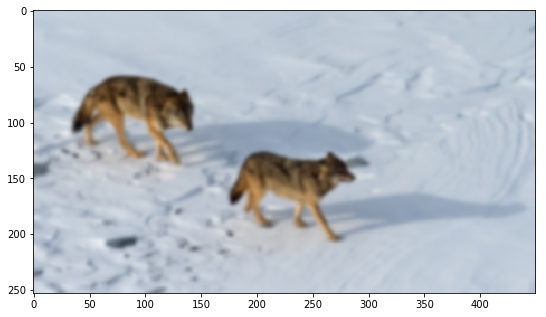

In [21]:
# Blur image
image_blur = cv2.GaussianBlur(img, (9, 9), 0)
show_rgb(image_blur)